In [2]:
from requests import get
import re
import sys
import matplotlib.pyplot as plt
import numpy as np

# popular streamers
streamnames = { "xqc": ["xqc"], "summit": ["summit"], "tyler1": ["tyler", "t1"], "mizkif": ["miz", "mizkif"], "erobb": ["erobb", "wrobb", "lrobb"], "soda": ["soda", "chance morris"],
                "josh": ["josh"], "forsen": ["forsen"], "destiny": ["destiny"], "doc": ["doc", "drdisrespect"], "pokelawls": ["poke", "pokelawls"], "pokimane": ["poki", "pokimane"],
                "mitch": ["mitch"], "hassan": ["hassan", "hasan", "hasanabi"], "asmon": ["asmon"], "trainwreck": ["train"], "alinity": ["alinity"], "greek": ["greek"], "maya": ["maya"],
                "anita": ["anita"], "lirik": ["lirik"], "shroud": ["shroud"], "ice": ["ice", "cx"], "moon": ["moon"], "qt": ["qt"], "rajj": ["rajj"]}

streamcount = { "xqc": 0, "summit": 0, "tyler1": 0, "mizkif": 0, "erobb": 0, "soda": 0, "josh": 0, "forsen": 0, "destiny": 0, "doc": 0, "pokelawls": 0, "pokimane": 0,
                "mitch": 0, "hassan": 0, "asmon": 0, "trainwreck": 0, "alinity": 0, "greek": 0, "maya": 0, "anita": 0, "lirik": 0, "shroud": 0, "ice": 0, "moon": 0, "qt": 0, "rajj": 0}

In [3]:
toAdd = get('https://api.pushshift.io/reddit/search/submission/?subreddit=LivestreamFail&limit=500')

i = 0
#while (toAdd.text != None):
# 3 is a test amount
while i < 10:
    i = i+1

    title = ""
    score = 0
    timeUTC = 0

    print("While starts")
    post = toAdd.text

    splitpost = post.split("\"all_awardings\": [],")

    for item in splitpost:
        if re.search("\"score\"", item) is not None:
            score = re.search("\"score\": .*", item).group(0)
            score = score[9:-1]
        if re.search("\"title\"", item) is not None:
            title = re.search("\"title\": .*\"", item).group(0)
            title = title[10:-1].lower()
        if re.search("\"created_utc\"", item) is not None:
            created_utc = re.search("\"created_utc\": .*", item).group(0)
            timeUTC = created_utc.split(" ")
            timeUTC = timeUTC[-1][:-1]

        for aname in streamnames:
            for name in streamnames[aname]:
                if re.search(name, title) is not None:
                    streamcount[aname] = streamcount[aname] + 1

    toAdd = get('https://api.pushshift.io/reddit/search/submission/?subreddit=LivestreamFail&sort=desc&sort_type=created_utc&before=' + timeUTC + '&size=500')
    print(toAdd)

print(streamcount)

While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
While starts
<Response [200]>
{'xqc': 330, 'summit': 19, 'tyler1': 44, 'mizkif': 397, 'erobb': 104, 'soda': 76, 'josh': 46, 'forsen': 47, 'destiny': 19, 'doc': 35, 'pokelawls': 55, 'pokimane': 88, 'mitch': 69, 'hassan': 75, 'asmon': 137, 'trainwreck': 105, 'alinity': 31, 'greek': 162, 'maya': 78, 'anita': 3, 'lirik': 8, 'shroud': 12, 'ice': 92, 'moon': 6, 'qt': 18, 'rajj': 62}


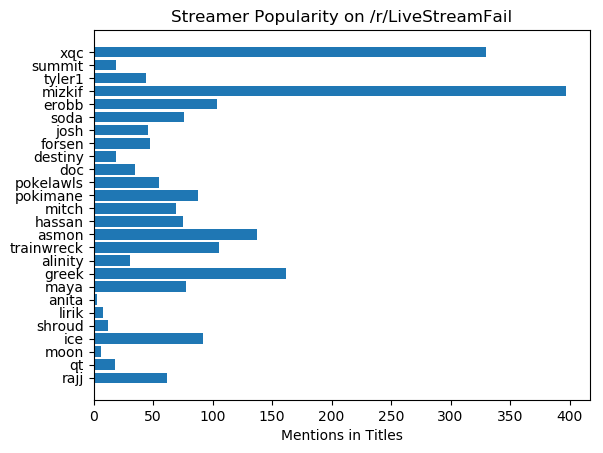

In [4]:
plt.rcdefaults()
fig, ax = plt.subplots()
peoplelist = []
popularity = []
for key in streamcount:
    peoplelist.append(key)
    popularity.append(streamcount[key])

y_pos = np.arange(len(peoplelist))

ax.barh(y_pos, popularity, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(peoplelist)
ax.invert_yaxis()
ax.set_xlabel('Mentions in Titles')
ax.set_title('Streamer Popularity on /r/LiveStreamFail')

plt.show()